In [2]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import os

#from settings.local_settings import DATA_DIR

In [7]:
state = 'WA'
population_file = f"/{state}/counties/graph/{state}.population"
dimacs_file = f"/{state}/counties/graph/{state}.dimacs"

with open(f"/districting_2020/Numberofdistricts.txt", "r") as file:
    for line in file:
        parts = line.strip().split('\t')
        if parts[0] == state:
            num_districts = int(parts[1])


with open(population_file, "r") as file:
    # Skip the first line
    next(file)
    # Count the number of lines, each line represents a county
    num_counties = sum(1 for line in file)

num_districts


FileNotFoundError: [Errno 2] No such file or directory: '/districting_2020/Numberofdistricts.txt'

In [23]:
## Reading distances from file
distances_file = os.path.join(DATA_DIR, "counties", "graph", f"{state}_distances.csv")
distances = np.genfromtxt(distances_file, delimiter=',', skip_header=1)
distances = distances[:, 1:]

## Reading populations from file
with open(population_file, 'r') as file:
    # Read the total population from the first line
    total_population_line = next(file).strip()  # Removes newline character at the end
    total_population = int(total_population_line.split('=')[1].strip())
    
    # Initialize a dictionary to store the rest of the data
    p = {}
    
    # Iterate over the remaining lines
    for line in file:
        # Each line is expected to have two values, separated by a space
        key, value = line.strip().split()  # Split by whitespace
        p[int(key)] = int(value)  # Convert both to integers and store in the dictionary

## Reading neighbors from file
neighbors = set()
with open(dimacs, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith('e'):
            _, node1, node2 = line.split()
            node1 = int(node1)
            node2 = int(node2)
            if (node1, node2) not in neighbors and (node2, node1) not in neighbors:
                neighbors.add((node1, node2))

list(neighbors)

[(16, 20),
 (18, 35),
 (13, 17),
 (13, 26),
 (2, 32),
 (9, 28),
 (15, 16),
 (8, 32),
 (19, 32),
 (13, 28),
 (15, 25),
 (24, 28),
 (11, 37),
 (2, 34),
 (7, 30),
 (29, 36),
 (31, 33),
 (9, 12),
 (12, 29),
 (4, 34),
 (15, 18),
 (20, 35),
 (4, 18),
 (22, 32),
 (19, 36),
 (10, 33),
 (12, 24),
 (23, 24),
 (23, 33),
 (14, 30),
 (4, 38),
 (19, 29),
 (10, 26),
 (2, 22),
 (2, 31),
 (15, 34),
 (20, 30),
 (21, 29),
 (8, 31),
 (11, 36),
 (6, 15),
 (3, 7),
 (6, 33),
 (12, 28),
 (14, 25),
 (23, 28),
 (27, 28),
 (2, 8),
 (5, 34),
 (8, 33),
 (11, 29),
 (0, 38),
 (32, 36),
 (20, 25),
 (21, 24),
 (12, 21),
 (29, 37),
 (18, 34),
 (22, 34),
 (1, 11),
 (11, 22),
 (6, 10),
 (15, 31),
 (8, 19),
 (22, 36),
 (9, 27),
 (13, 27),
 (7, 20),
 (1, 34),
 (15, 33),
 (18, 20),
 (26, 33),
 (18, 38),
 (2, 5),
 (19, 21),
 (5, 31),
 (28, 33),
 (0, 35),
 (6, 14),
 (16, 25),
 (35, 38),
 (5, 15),
 (17, 26),
 (8, 23),
 (19, 23),
 (16, 18),
 (26, 28),
 (6, 25),
 (25, 30),
 (21, 23),
 (3, 20),
 (1, 22)]

In [24]:
adjacency_matrix_file = r"districting_2020\\2020\\{}\\counties\\graph\\{}_distances.csv".format(state, state)

# Set decision variable x for each node i whether it is in district j
x = {}
for i in range(num_counties):
    for j in range(num_districts):
        x[i, j] = m.addVar(vtype=gp.GRB.BINARY, name="x_{}_{}".format(i, j))

## Set decision variable y for each edge in neighbors, between nodes i and k, for each district j
y = {}
for i, k in neighbors:
    for j in range(num_districts):
        y[i, k, j] = m.addVar(vtype=gp.GRB.BINARY, name="y_{}_{}_{}".format(i, k, j))

# for i in range(num_counties):
#     for k in range(num_counties):
#         for j in range(num_districts):
#             y[i, k, j] = m.addVar(vtype=gp.GRB.BINARY, name="y_{}_{}_{}".format(i, k, j))

# Set slack variable
slack = {}
for j in range(num_districts):
    slack[j] = m.addVar(obj=1, name="slack")




alpha = 100  # Weight of the balanced weight term
y


{(16, 20, 0): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 1): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 2): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 3): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 4): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 5): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 6): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 7): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 8): <gurobi.Var *Awaiting Model Update*>,
 (16, 20, 9): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 0): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 1): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 2): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 3): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 4): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 5): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 6): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 7): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 8): <gurobi.Var *Awaiting Model Update*>,
 (18, 35, 9)

In [25]:
# Set objective function
m.setObjective(-gp.quicksum(y[i, k, j] * distances[i, k] for i, k in neighbors for j in range(num_districts)) \
             + alpha * (gp.quicksum(slack[j] for j in range(num_districts))), gp.GRB.MINIMIZE)


In [26]:
## Add constraints

# Each edge in neighbors is assigned to exactly one district
for i, k in neighbors:
    for j in range(num_districts):
        m.addConstr(x[i, j] + x[k, j] >= 2 * y[i, k, j] )
        m.addConstr(x[i, j] + x[k, j] <= 1 + y[i, k, j] )

# Add population constraint with slack variable
for j in range(num_districts):
    m.addConstr(gp.quicksum(x[i, j] * p[i] for i in range(num_counties)) >= ((total_population / num_districts) - slack[j]))
    m.addConstr(gp.quicksum(x[i, j] * p[i] for i in range(num_counties)) <= ((total_population / num_districts) + slack[j]))
    
# Each county is assigned to exactly one district
for i in range(num_counties):
    m.addConstr(gp.quicksum(x[i, j] for j in range(num_districts)) == 1)



In [27]:
# Write LP formulation to a file
m.write("districts.lp")

# Read the LP formulation from the file
with open("districts.lp", "r") as f:
    lp_formulation = f.read()

# Print LP formulation
print("LP Formulation:")
print(lp_formulation)

# Solve
m.optimize()

LP Formulation:
\ Model district
\ LP format - for model browsing. Use MPS format to capture full model detail.
Minimize
  - 80 y_16_20_0 - 80 y_16_20_1 - 80 y_16_20_2 - 80 y_16_20_3 - 80 y_16_20_4
   - 80 y_16_20_5 - 80 y_16_20_6 - 80 y_16_20_7 - 80 y_16_20_8
   - 80 y_16_20_9 - 76 y_18_35_0 - 76 y_18_35_1 - 76 y_18_35_2
   - 76 y_18_35_3 - 76 y_18_35_4 - 76 y_18_35_5 - 76 y_18_35_6
   - 76 y_18_35_7 - 76 y_18_35_8 - 76 y_18_35_9 - 49 y_13_17_0
   - 49 y_13_17_1 - 49 y_13_17_2 - 49 y_13_17_3 - 49 y_13_17_4
   - 49 y_13_17_5 - 49 y_13_17_6 - 49 y_13_17_7 - 49 y_13_17_8
   - 49 y_13_17_9 - 62 y_13_26_0 - 62 y_13_26_1 - 62 y_13_26_2
   - 62 y_13_26_3 - 62 y_13_26_4 - 62 y_13_26_5 - 62 y_13_26_6
   - 62 y_13_26_7 - 62 y_13_26_8 - 62 y_13_26_9 - 85 y_2_32_0 - 85 y_2_32_1
   - 85 y_2_32_2 - 85 y_2_32_3 - 85 y_2_32_4 - 85 y_2_32_5 - 85 y_2_32_6
   - 85 y_2_32_7 - 85 y_2_32_8 - 85 y_2_32_9 - 106 y_9_28_0 - 106 y_9_28_1
   - 106 y_9_28_2 - 106 y_9_28_3 - 106 y_9_28_4 - 106 y_9_28_5
   - 106 y_

In [28]:
# Solve
m.optimize()

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1899 rows, 1320 columns and 6710 nonzeros
Model fingerprint: 0xcb8fe401
Variable types: 10 continuous, 1310 integer (1310 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+06]
  Objective range  [3e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+05]
Presolved: 1899 rows, 1320 columns, 6710 nonzeros

Continuing optimization...


Cutting planes:
  Gomory: 19
  Cover: 1324
  Implied bound: 30
  Clique: 1
  MIR: 7
  Zero half: 37
  RLT: 130

Explored 1714 nodes (271032 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 10: 3.41431e+08 3.41431e+08 3.41431e+08 ... 3.41433e+08

Optimal solution found (tolerance 1.00e-04)
Best

In [29]:
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nObjective Value: %g' % m.ObjVal)
        for i in range(num_counties):
            for j in range(num_districts):
                print("x_{}_{} = {}".format(i, j, x[i, j].X))
        for j in range(num_districts):
            print("slack_{} = {}".format(j, slack[j].X))
    else:
        print('No solution')

printSolution()


Objective Value: 3.41431e+08
x_0_0 = 1.0
x_0_1 = 0.0
x_0_2 = 0.0
x_0_3 = 0.0
x_0_4 = 0.0
x_0_5 = 0.0
x_0_6 = 0.0
x_0_7 = 0.0
x_0_8 = 0.0
x_0_9 = 0.0
x_1_0 = 0.0
x_1_1 = 0.0
x_1_2 = 0.0
x_1_3 = 0.0
x_1_4 = 0.0
x_1_5 = 0.0
x_1_6 = 0.0
x_1_7 = 0.0
x_1_8 = 1.0
x_1_9 = 0.0
x_2_0 = 0.0
x_2_1 = 0.0
x_2_2 = 0.0
x_2_3 = 0.0
x_2_4 = 0.0
x_2_5 = 0.0
x_2_6 = 0.0
x_2_7 = 0.0
x_2_8 = 0.0
x_2_9 = 1.0
x_3_0 = 0.0
x_3_1 = 0.0
x_3_2 = 0.0
x_3_3 = 0.0
x_3_4 = 0.0
x_3_5 = 0.0
x_3_6 = 0.0
x_3_7 = 0.0
x_3_8 = 0.0
x_3_9 = 1.0
x_4_0 = 0.0
x_4_1 = 0.0
x_4_2 = 0.0
x_4_3 = 0.0
x_4_4 = 0.0
x_4_5 = 0.0
x_4_6 = 0.0
x_4_7 = 0.0
x_4_8 = 0.0
x_4_9 = 1.0
x_5_0 = 0.0
x_5_1 = 0.0
x_5_2 = 0.0
x_5_3 = 0.0
x_5_4 = 0.0
x_5_5 = 0.0
x_5_6 = 0.0
x_5_7 = 0.0
x_5_8 = 0.0
x_5_9 = 1.0
x_6_0 = 0.0
x_6_1 = 0.0
x_6_2 = 0.0
x_6_3 = 1.0
x_6_4 = 0.0
x_6_5 = 0.0
x_6_6 = 0.0
x_6_7 = 0.0
x_6_8 = 0.0
x_6_9 = 0.0
x_7_0 = 0.0
x_7_1 = 0.0
x_7_2 = 0.0
x_7_3 = 0.0
x_7_4 = 0.0
x_7_5 = 0.0
x_7_6 = 0.0
x_7_7 = 0.0
x_7_8 = 0.0
x_7_9 = 1.0
x_8_0 = 0.

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

shape_file = os.path.join(DATA_DIR, "counties", "maps", f"{state}_counties.shp")
counties = gpd.read_file(shape_file)

counties.plot(column='NAME20', legend = True)
plt.show()

NameError: name 'DATA_DIR' is not defined

In [12]:
def get_district_edges():
    # Initialize a dictionary to hold edges for each district
    district_edges = {j: set() for j in range(num_districts)}

    # Iterate over y variables to find edges included in each district
    for (i, k, j) in y:
        if y[i, k, j].X > 0.5:  # Edge is part of the district
            district_edges[j].add((i, k))
    
    return district_edges

# Assuming the model has been optimized
if m.status == GRB.OPTIMAL:
    district_edges = get_district_edges()
    for j, edges in district_edges.items():
        print(f"District {j} edges: {edges}")
else:
    print("No solution")


District 0 edges: {(0, 35)}
District 1 edges: {(12, 21), (12, 24), (21, 24)}
District 2 edges: set()
District 3 edges: {(28, 33), (13, 27), (26, 33), (10, 33), (13, 26), (9, 28), (6, 33), (10, 26), (13, 28), (6, 10), (9, 27), (26, 28), (27, 28)}
District 4 edges: {(11, 36), (29, 36), (11, 29), (19, 36), (1, 11), (19, 29), (29, 37), (11, 37)}
District 5 edges: set()
District 6 edges: set()
District 7 edges: set()
District 8 edges: {(16, 20), (7, 20), (18, 20), (3, 7), (18, 38), (14, 25), (4, 18), (2, 5), (5, 31), (5, 34), (16, 25), (20, 25), (18, 34), (5, 15), (14, 30), (22, 34), (4, 38), (15, 16), (2, 22), (15, 25), (16, 18), (2, 31), (25, 30), (2, 34), (7, 30), (15, 31), (15, 34), (20, 30), (3, 20), (4, 34), (15, 18)}
District 9 edges: set()


In [30]:
def get_district_counties():
    # Initialize a dictionary to hold counties for each district
    district_counties = {j: set() for j in range(num_districts)}

    # Iterate over x variables to find counties assigned to each district
    for i in range(num_counties):
        for j in range(num_districts):
            if x[i, j].X > 0.5:  # County is part of the district
                district_counties[j].add(i)
    
    return district_counties

# Assuming the model has been optimized
if m.status == GRB.OPTIMAL:
    district_counties = get_district_counties()
    for j, counties in district_counties.items():
        print(f"District {j} contains counties: {counties}")
else:
    print("No solution")


District 0 contains counties: {0, 35}
District 1 contains counties: {23}
District 2 contains counties: {8}
District 3 contains counties: {33, 6, 9, 10, 13, 26, 27, 28}
District 4 contains counties: set()
District 5 contains counties: {17}
District 6 contains counties: {32}
District 7 contains counties: {24, 12, 21}
District 8 contains counties: {1, 36, 37, 11, 19, 29}
District 9 contains counties: {2, 3, 4, 5, 34, 7, 38, 14, 15, 16, 18, 20, 22, 25, 30, 31}


In [31]:
counties_gdf

,STATEFP20,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CSAFP20,CBSAFP20,METDIVFP20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,county_id,district
0,53,051,01529157,53051,Pend Oreille,Pend Oreille County,06,H1,G4020,None,None,None,A,3626617235,65406812,+48.5438247,-117.2321913,"POLYGON ((-117.49995 48.65277, -117.49996 48.6...",0,0
1,53,073,01529224,53073,Whatcom,Whatcom County,06,H1,G4020,None,13380,None,A,5459483486,1028111662,+48.8426531,-121.8364325,"POLYGON ((-122.55071 49.00222, -122.53987 49.0...",1,4
2,53,007,01531932,53007,Chelan,Chelan County,06,H1,G4020,None,48300,None,A,7565814942,189653434,+47.8609739,-120.6190410,"POLYGON ((-120.90743 48.16318, -120.90740 48.1...",2,8
3,53,003,01533502,53003,Asotin,Asotin County,06,H1,G4020,None,30300,None,A,1647427902,11291733,+46.1818612,-117.2277813,"POLYGON ((-117.41943 46.27759, -117.41943 46.2...",3,8
4,53,019,01531821,53019,Ferry,Ferry County,06,H1,G4020,None,None,None,A,5706368585,140294391,+48.4732563,-118.5335894,"POLYGON ((-118.83694 48.82711, -118.83693 48.8...",4,8
5,53,017,01531818,53017,Douglas,Douglas County,06,H1,G4020,None,48300,None,A,4711819965,76557106,+47.7417625,-119.6946219,"POLYGON ((-120.29554 47.53124, -120.29521 47.5...",5,8
6,53,005,01513302,53005,Benton,Benton County,06,H1,G4020,313,28420,None,A,4403309851,154293639,+46.2281252,-119.5166594,"POLYGON ((-119.80052 46.63055, -119.79984 46.6...",6,3
7,53,023,01533500,53023,Garfield,Garfield County,06,H1,G4020,None,None,None,A,1841054897,19294817,+46.4293176,-117.5367052,"POLYGON ((-117.80466 46.62462, -117.80395 46.6...",7,8
8,53,033,01531933,53033,King,King County,06,H1,G4020,500,42660,42644,A,5478417256,497859101,+47.4905518,-121.8339765,"POLYGON ((-122.47069 47.52789, -122.46985 47.5...",8,2
9,53,049,01513274,53049,Pacific,Pacific County,06,H1,G4020,None,None,None,A,2418037245,758680651,+46.5565866,-123.7824193,"POLYGON ((-124.16114 46.71342, -124.16256 46.7...",9,3


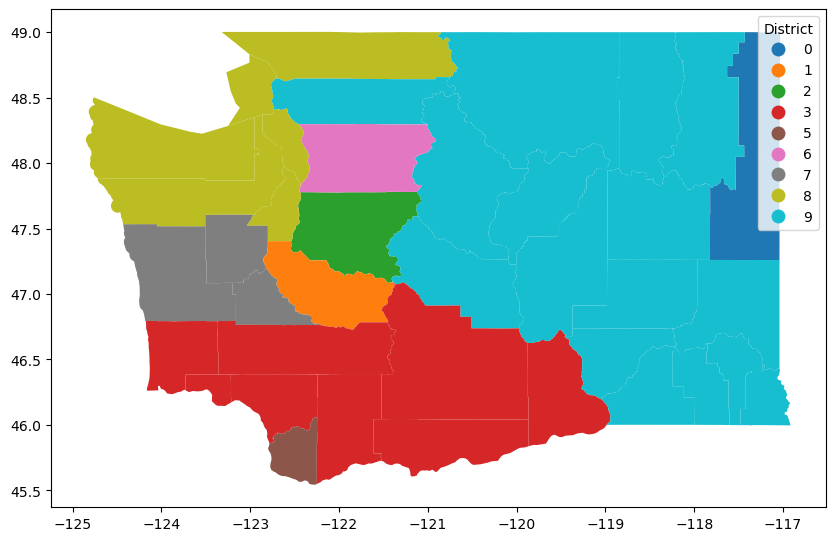

In [32]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

path_to_visualize = "districting_2020/2020/{}/counties/maps/{}_counties.shp".format(state, state)
# Load the shapefile
counties_gdf = gpd.read_file(path_to_visualize)

# Example: Assuming 'county_id' is a column in your GeoDataFrame that matches keys used in your model
counties_gdf['county_id'] = range(len(counties_gdf))
counties_gdf['district'] = -1  # Initialize with -1 or another placeholder value

# Assuming district_counties is already filled from your optimization model
for district, counties in district_counties.items():
    for county in counties:
        # Update the 'district' column based on your county-to-district assignments
        # You may need to adjust the condition to match your GeoDataFrame's county identifiers
        counties_gdf.loc[counties_gdf['county_id'] == county, 'district'] = district


import matplotlib.pyplot as plt

# Ensure that the 'district' column exists and has been correctly populated
fig, ax = plt.subplots(figsize=(10, 10))
counties_gdf.plot(column='district', ax=ax, legend=True, categorical=True, legend_kwds={'title': 'District'})
plt.show()


